# Sander van de Kamp
#### 500734351 
#### 22/06/2021
# Convolutional Neural Network Fashion mnist dataset
Bij de fashion mnist dataset moet er een model gemaakt worden die afbeelding kan afbreken en bepalen welk soort kleding er in de afbeelding afgebeeld is, om dit te kunnen doen zal er een Convolutional Neural Network gebruikt moeten worden. Deze is beter dan een normaal neuraal netwerk omdat het door middel van de convoluties meer informatie kan ophalen aan de pixels. 

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [62]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, ReLU, PReLU
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Input, Model
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Text(0.5, 1.0, 'Label : 9')

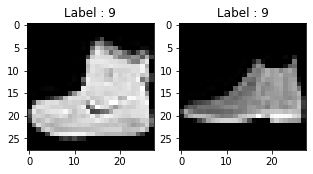

In [21]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_train[0]))

plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_test[0]))

## Data voorbereiding
Transform de dataset naar een dataset met 1D arrays die 28x28 groot zijn met float32 getallen erin.


In [22]:
train_X = X_train.reshape(-1, 28,28, 1).astype('float32')
test_X = X_test.reshape(-1, 28,28, 1).astype('float32')

train_X = train_X / 255.
test_X = test_X / 255.

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Transform int labels naar one hot encoded labels

In [23]:
train_Y_encoded = to_categorical(y_train)
test_Y_encoded = to_categorical(y_test)

print(f'Origineel: {y_train[0]}, encoded: {train_Y_encoded[0]}')

Origineel: 9, encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
X_train, X_val, y_train, y_val = train_test_split(train_X, train_Y_encoded, test_size=0.2, random_state=13)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Maak het model
Het model krijgt drie convolutie lagen en twee dense lagen

In [25]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [26]:
fashion_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [27]:
fashion_train = fashion_model.fit(X_train, y_train, batch_size = 64, epochs = 10, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/10
750/750 [==============================] - 52s 67ms/step - loss: 0.6994 - accuracy: 0.7486 - val_loss: 0.3289 - val_accuracy: 0.8806
Epoch 2/10
750/750 [==============================] - 47s 62ms/step - loss: 0.2934 - accuracy: 0.8929 - val_loss: 0.2664 - val_accuracy: 0.9017
Epoch 3/10
750/750 [==============================] - 50s 67ms/step - loss: 0.2362 - accuracy: 0.9143 - val_loss: 0.2500 - val_accuracy: 0.9081
Epoch 4/10
750/750 [==============================] - 63s 85ms/step - loss: 0.2013 - accuracy: 0.9259 - val_loss: 0.2691 - val_accuracy: 0.8998
Epoch 5/10
750/750 [==============================] - 60s 79ms/step - loss: 0.1776 - accuracy: 0.9346 - val_loss: 0.2237 - val_accuracy: 0.9189
Epoch 6/10
750/750 [==============================] - 47s 63ms/step - loss: 0.1523 - accuracy: 0.9436 - val_loss: 0.2249 - val_accuracy: 0.9212
Epoch 7/10
750/750 [==============================] - 48s 64ms/step - loss: 0.1287 - accuracy: 0.9518 - val_loss: 0.2409 - val_accuracy:

In [29]:
test_eval = fashion_model.evaluate(test_X, test_Y_encoded, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.296123206615448
Test accuracy: 0.9178000092506409


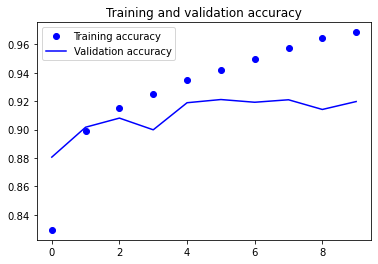

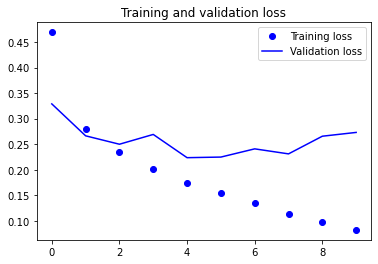

In [30]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Op de bovenstaande afbeelding is te zien dat het model aan het overfitten is, dit is te zien aan het feit dat de accuracy en loss van het model beter werdt terwijl de validation accuracy en loss stagneerde of slechter werdt. 

## Model verbeteren
Model was aan het overtrainen, hierom om het model te verbeteren moeten er dropout layers toegevoegd worden. De dropout layers zullen ervoor zorgen dat het model niet overtrained kan raken door willekeurig waardes naar 0 te zetten. Hierdoor is er daar bovenop ook nog eens de kans dat er met geluk een beter model uit kan komen.

In [32]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dropout(0.25))
fashion_model.add(Dense(10, activation='softmax'))

In [33]:
fashion_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)         

In [34]:
fashion_train = fashion_model.fit(X_train, y_train, batch_size = 64,epochs = 10, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/10
750/750 [==============================] - 55s 70ms/step - loss: 0.8266 - accuracy: 0.6917 - val_loss: 0.3719 - val_accuracy: 0.8654
Epoch 2/10
750/750 [==============================] - 53s 70ms/step - loss: 0.3814 - accuracy: 0.8591 - val_loss: 0.3046 - val_accuracy: 0.8897
Epoch 3/10
750/750 [==============================] - 50s 67ms/step - loss: 0.3160 - accuracy: 0.8827 - val_loss: 0.2753 - val_accuracy: 0.8991
Epoch 4/10
750/750 [==============================] - 50s 66ms/step - loss: 0.2832 - accuracy: 0.8950 - val_loss: 0.2707 - val_accuracy: 0.9028
Epoch 5/10
750/750 [==============================] - 49s 66ms/step - loss: 0.2689 - accuracy: 0.9028 - val_loss: 0.2530 - val_accuracy: 0.9085
Epoch 6/10
750/750 [==============================] - 52s 69ms/step - loss: 0.2554 - accuracy: 0.9055 - val_loss: 0.2409 - val_accuracy: 0.9122
Epoch 7/10
750/750 [==============================] - 53s 71ms/step - loss: 0.2427 - accuracy: 0.9086 - val_loss: 0.2335 - val_accuracy:

In [38]:
test_eval = fashion_model.evaluate(test_X, test_Y_encoded, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.23225674033164978
Test accuracy: 0.9154000282287598


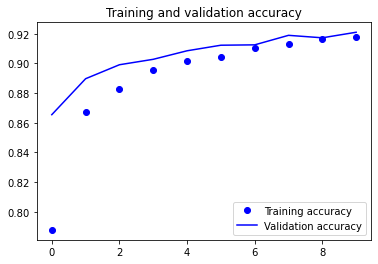

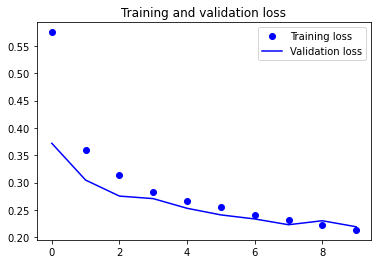

In [39]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Voorspellingen Incorrecte labels

Found 884 incorrect labels


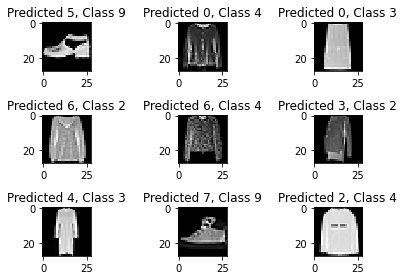

In [41]:
incorrect = np.where(predicted_classes!=y_test)[0]

print("Found %d incorrect labels" % len(incorrect))

for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

## Voorspellingen Correcte labels

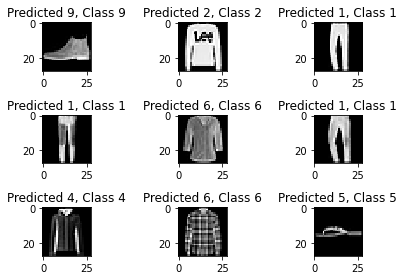

In [40]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
correct = np.where(predicted_classes == y_test)[0]

for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

# Evaluatie
Als er overfitting plaats vind in een Neuraal network is het nodig om dropout layers toe te voegen, door willekeurig neuronen weer op 0 te zetten kan het model niet perfect gefit worden op de trainings data. Hierdoor zorgt het er dan ook voor dat er door het willekeurig neuronen op 0 te zetten er een beter model dan eerst uit kan komen, aangezien er hiermee ook kansen ontstaan dat het model beter past op de validatie set dan eerst.

De opbouw van de CNN zorgt er ook uiteindelijk voor dat er een accuracy van ongeveer 92% op de training en validatie dataset is, alleen betekend niet dat dit ook meteen perfect is. Er zouden meer of minder CNN lagen gebruikt kunnen worden of de hoeveelheid Dense layers op het einde kan aangepast worden, ook kan het dropout percentage aangepast worden. 

Bij het verwijderen van 1 Convolutie laag en de Dense laag verminderen naar 64 neuronen (model 2 hieron), blijft de accuracy op 10 epochs bijna precies hetzelfde met ongeveer 92% op train en validatie datasets. Wat erop duidt dat het vorige model op 10 epochs te ingewikkeld was als hetzelfde resultaat berijkt wordt met een simpler model. Alleen is dit natuurlijk op 10 epochs, als er meer gedaan waren zal het vorige model waarschijnlijk beter zijn geweest.

Bij het voorbeeld (model 3 hieronder) werdt er gebruik gemaakt van dropout rates tussen de 0.3 en 0.4, door deze dropout rates zo hoog te doen lijkt het er alleen op dat het model niet meer in staat is om volledig te trainen. Dit lijkt er dan ook door te komen dat er te veel neuronen op 0 gezet worden, waardoor het model er niet in slaagt om op een hogere accuracy te komen.

Bij model 4 heb ik de activatiefunctie vervangen en de vorm van het oorspronkelijke model gebruikt, bij het vervangen met normale ReLU ging de accuracy op beide datasetes naar 91.5% en met PReLU is de accuracy naar 91.5% op test en 92.5% op validatie. 

De hoeveelheid epochs had ook hoger gemoeten om een betere accuracy te krijgen, alleen in verband met de tijd dat het duurt om te trainen is het sneller op het lager te halen. De overfittings problemen zijn al zichtbaar bij 4-5 epochs.

---

kortom,

De hoeveelheid lagen, dropouts en hoe groot de lagen zijn is iets waar altijd mee gespeeld moet worden om de best mogelijke accuraatheid te krijgen, aangezien elke kleine verandering al een verschil in accuraatheid kan maken. een te hoge dropout zorgt ervoor dat het model niet kan trainen en te laag/geen dat het overfit. De hoeveelheid lagen zal gokken blijven, maar te veel of te wijnig lagen zal leiden tot een slecht model. 

Ook kan er gespeeld worden met de activatiefuncties, waarbij het wisselen van activatiefuncties ervoor kan zorgen dat de accuracy nog met een klein percentage beter/slechter wordt. Dit is echter geen efficiënte manier om te optimaliseren, aangezien het veel tijd kost voor erg weinig resultaat.

Daarnaast is er ook nog de mogelijkheid om een al getrained model te gebruiken en deze te trainen op de dataset, alleen laat ik dat voor een ander deep learning model (RNN)

Bron:
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

---

Model 2 (simpel voorbeeld)

Conv2D (32, linear, LeakyReLU)
MaxPooling2D (2, 2)
dropout (0.25)

Conv2D (64, linear, LeakyReLU)
MaxPooling2D (2, 2)
dropout (0.25)

Dense (64, LeakyReLU)
Dropout (0.25)
Dense (10)

---

Model 3 (simpel voorbeeld)

Conv2D (32, linear, LeakyReLU)
MaxPooling2D (2, 2)
dropout (0.3)

Conv2D (64, linear, LeakyReLU)
MaxPooling2D (2, 2)
dropout (0.35)

Conv2D (128, linear, LeakyReLU)
MaxPooling2D (2, 2)
dropout (0.4)

Dense (128, LeakyReLU)
Dropout (0.4)
Dense (10)

--- 

Model 4 (simpel voorbeeld)

Conv2D (32, linear, ReLU / PReLU)
MaxPooling2D (2, 2)
dropout (0.3)

Conv2D (64, linear, ReLU / PReLU)
MaxPooling2D (2, 2)
dropout (0.35)

Conv2D (128, linear, ReLU / PReLU)
MaxPooling2D (2, 2)
dropout (0.4)

Dense (128, ReLU)
Dropout (0.4)
Dense (10)

In [64]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(PReLU())
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(PReLU())
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(PReLU())                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(PReLU())                  
fashion_model.add(Dropout(0.25))
fashion_model.add(Dense(10, activation='softmax'))

fashion_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
fashion_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
p_re_lu (PReLU)              (None, 28, 28, 32)        25088     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 14, 14, 64)        12544     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)        

In [65]:
fashion_train = fashion_model.fit(X_train, y_train, batch_size = 64,epochs = 10, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/10
750/750 [==============================] - 59s 75ms/step - loss: 0.8753 - accuracy: 0.6738 - val_loss: 0.3808 - val_accuracy: 0.8607
Epoch 2/10
750/750 [==============================] - 61s 81ms/step - loss: 0.3857 - accuracy: 0.8594 - val_loss: 0.3072 - val_accuracy: 0.8882
Epoch 3/10
750/750 [==============================] - 55s 74ms/step - loss: 0.3283 - accuracy: 0.8786 - val_loss: 0.2838 - val_accuracy: 0.8972
Epoch 4/10
750/750 [==============================] - 56s 75ms/step - loss: 0.2917 - accuracy: 0.8911 - val_loss: 0.2584 - val_accuracy: 0.9053
Epoch 5/10
750/750 [==============================] - 56s 74ms/step - loss: 0.2744 - accuracy: 0.8992 - val_loss: 0.2522 - val_accuracy: 0.9084
Epoch 6/10
750/750 [==============================] - 56s 75ms/step - loss: 0.2505 - accuracy: 0.9076 - val_loss: 0.2480 - val_accuracy: 0.9097
Epoch 7/10
750/750 [==============================] - 56s 75ms/step - loss: 0.2478 - accuracy: 0.9073 - val_loss: 0.2333 - val_accuracy:

In [66]:
test_eval = fashion_model.evaluate(test_X, test_Y_encoded, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22364938259124756
Test accuracy: 0.9182999730110168


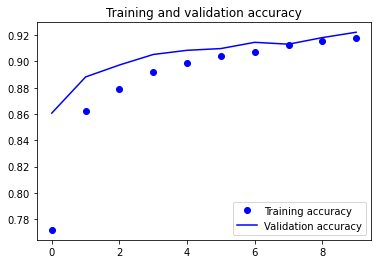

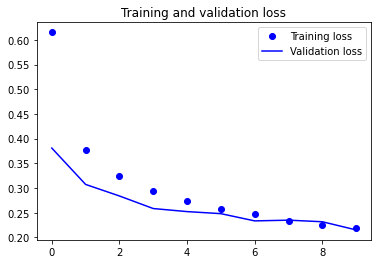

In [67]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()